In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
import pickle
import time
from sklearn.svm import LinearSVC

In [44]:
# #updated path of data:
# #importing the zipfile module
# from zipfile import ZipFile
# with ZipFile("/content/drive/MyDrive/archive (1).zip", 'r') as zObject:

#     zObject.extractall(
#         path="/content/drive/MyDrive")


# df = pd.read_csv('/content/drive/MyDrive/hrv_dataset/hrv_dataset/data/final/train.csv')

In [45]:
# #mounting the google drive:
# from google.colab import drive
# drive.mount('/content/drive')

In [46]:
df = pd.read_csv("train.csv")


In [47]:
df.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            369289 non-null  float64
 1   MEDIAN_RR          369289 non-null  float64
 2   SDRR               369289 non-null  float64
 3   RMSSD              369289 non-null  float64
 4   SDSD               369289 non-null  float64
 5   SDRR_RMSSD         369289 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              369289 non-null  float64
 8   pNN50              369289 non-null  float64
 9   SD1                369289 non-null  float64
 10  SD2                369289 non-null  float64
 11  KURT               369289 non-null  float64
 12  SKEW               369289 non-null  float64
 13  MEAN_REL_RR        369289 non-null  float64
 14  MEDIAN_REL_RR      369289 non-null  float64
 15  SDRR_REL_RR        369289 non-null  float64
 16  RM

In [49]:
print(df.describe())

             MEAN_RR      MEDIAN_RR           SDRR          RMSSD  \
count  369289.000000  369289.000000  369289.000000  369289.000000   
mean      846.650104     841.965890     109.352531      14.977498   
std       124.603984     132.321005      77.117025       4.120766   
min       547.492221     517.293295      27.233947       5.529742   
25%       760.228533     755.750735      64.205641      11.830959   
50%       822.951438     819.689595      82.608243      14.415918   
75%       924.117422     916.821570     118.237002      17.927144   
max      1322.016957    1653.122250     563.486949      26.629477   

                SDSD     SDRR_RMSSD             HR          pNN25  \
count  369289.000000  369289.000000  369289.000000  369289.000000   
mean       14.976767       7.396597      73.941824       9.841143   
std         4.120768       5.143834      10.337453       8.195574   
min         5.529630       2.660381      48.737243       0.000000   
25%        11.830671       4.5418

In [50]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [51]:
def pie_chart_condition(df):
    column_name = 'condition'

    # Count the occurrences of each category
    data = df[column_name].value_counts()

    # Create a pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {column_name}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

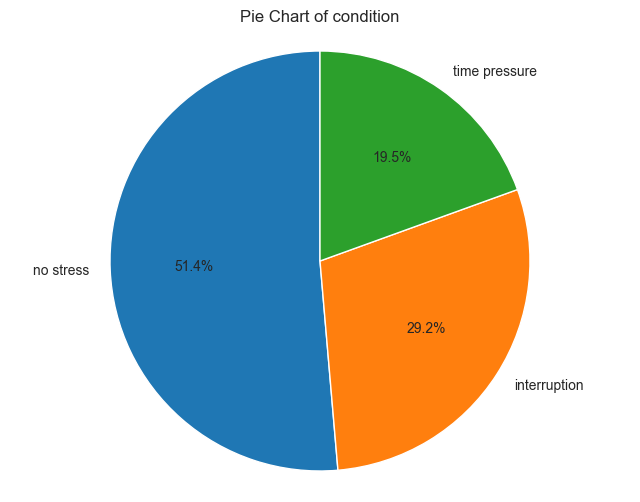

In [52]:
pie_chart_condition(df)

In [53]:
def replace_stress_factors(df):
    df['condition'] = df['condition'].replace(
        {'time pressure': 'Stressed', 'interruption': 'Stressed'}
    )

In [54]:
replace_stress_factors(df)

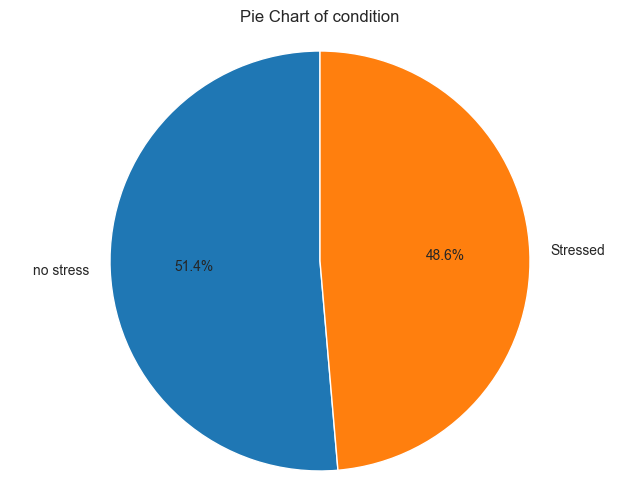

In [55]:
pie_chart_condition(df)

In [56]:
def graph(df):
# Set up the plot
    num_features = df.shape[1]  # Number of features
    fig, axes = plt.subplots(nrows=(num_features + 1) // 2, ncols=2, figsize=(14, 4 * ((num_features + 1) // 2)))
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    # Iterate through each column and plot
    for i, column in enumerate(df.columns):
        if pd.api.types.is_numeric_dtype(df[column]):  # Check if the column is numeric
            axes[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')
            axes[i].set_title(f'Histogram of {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')
            axes[i].grid(axis='y')
        else:
            data = df[column].value_counts()
            axes[i].bar(data.index.astype(str), data.values, color='skyblue')
            axes[i].set_title(f'Bar Graph of {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')
            axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
            axes[i].grid(axis='y')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

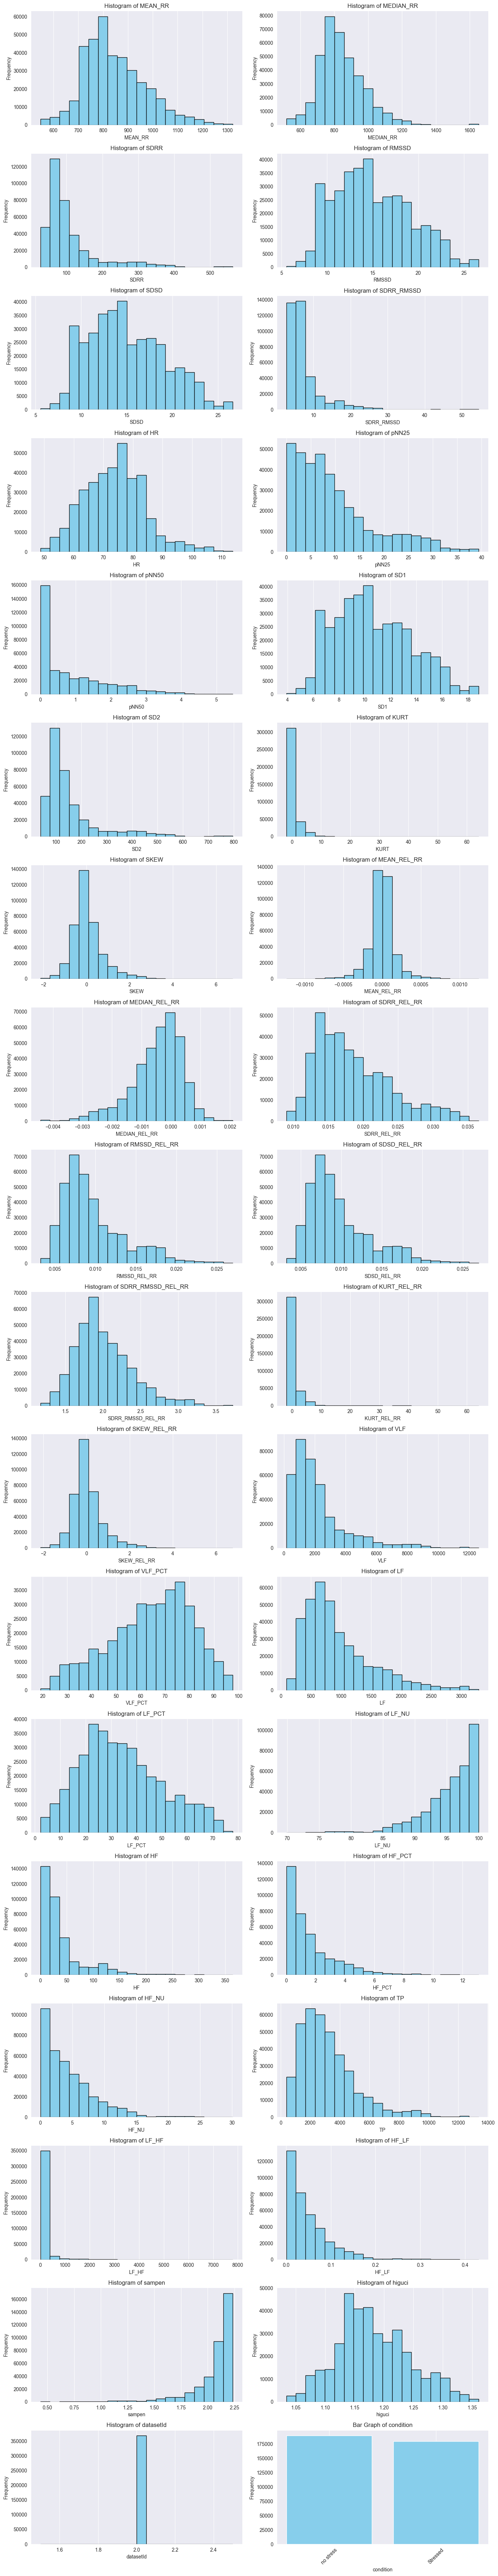

In [57]:
graph(df)

In [58]:
def remove_outliers_iqr(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.20)
        Q3 = df[column].quantile(0.85)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


In [59]:
cleaned_df = remove_outliers_iqr(df)

In [60]:
cleaned_df.shape

(262529, 36)

In [61]:
cleaned_df.describe()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId
count,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,...,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.0
mean,835.667885,837.801577,80.974137,14.347960,14.347696,5.752837,73.469985,8.955911,0.588988,10.148739,...,96.284190,29.919118,1.507661,3.715810,2549.765312,68.134451,0.039694,2.134098,1.189015,2.0
std,91.954545,93.014938,30.533233,3.999873,3.999852,1.759415,8.174249,8.116847,0.794100,2.829266,...,3.074492,27.592587,1.418724,3.074492,1223.187530,82.869742,0.034551,0.071677,0.057966,0.0
min,562.622537,554.940320,27.233947,5.529742,5.529630,2.660381,55.217892,0.000000,0.000000,3.911344,...,85.139373,1.125854,0.038147,0.224151,377.692795,5.729191,0.002247,1.875733,1.057620,2.0
25%,771.626190,773.441115,60.240740,11.356373,11.356088,4.409377,67.446295,3.000000,0.000000,8.032647,...,94.632478,11.399918,0.406526,1.226358,1613.439211,17.630569,0.012416,2.099025,1.147065,2.0
50%,820.551163,826.958170,74.143012,13.689216,13.689131,5.543480,73.787398,6.400000,0.200000,9.682907,...,97.068745,22.921329,1.074651,2.931255,2396.544464,33.115082,0.030198,2.155677,1.179494,2.0
75%,899.719431,902.370180,95.411926,16.944896,16.944476,6.686320,78.409798,11.933333,0.866667,11.985553,...,98.773642,37.578683,2.080445,5.367522,3313.622182,80.542229,0.056720,2.187043,1.225979,2.0
max,1111.686777,1145.789550,237.830744,26.502718,26.502507,14.774340,107.185211,39.400000,4.600000,18.746357,...,99.775849,129.894994,7.169156,14.860627,7456.421182,445.128249,0.174545,2.234841,1.354918,2.0


In [62]:
missing_values = cleaned_df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


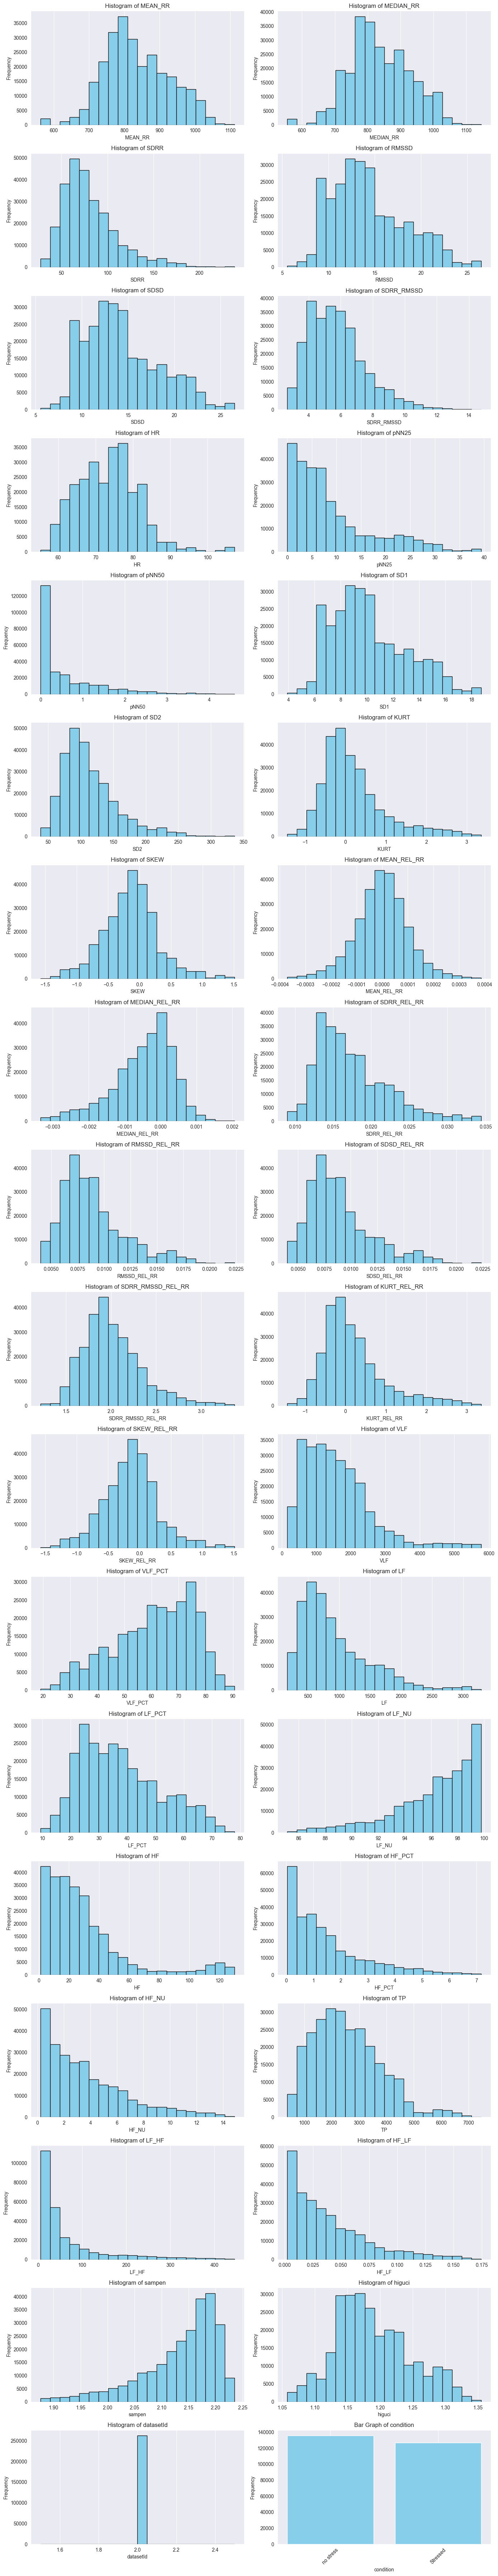

In [63]:
graph(cleaned_df)

In [64]:
def heatmap(df):
    # Select only the numeric columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Calculate the correlation matrix
    corr_matrix = numeric_df.corr().round(2)
    plt.figure(figsize=(30, 24))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

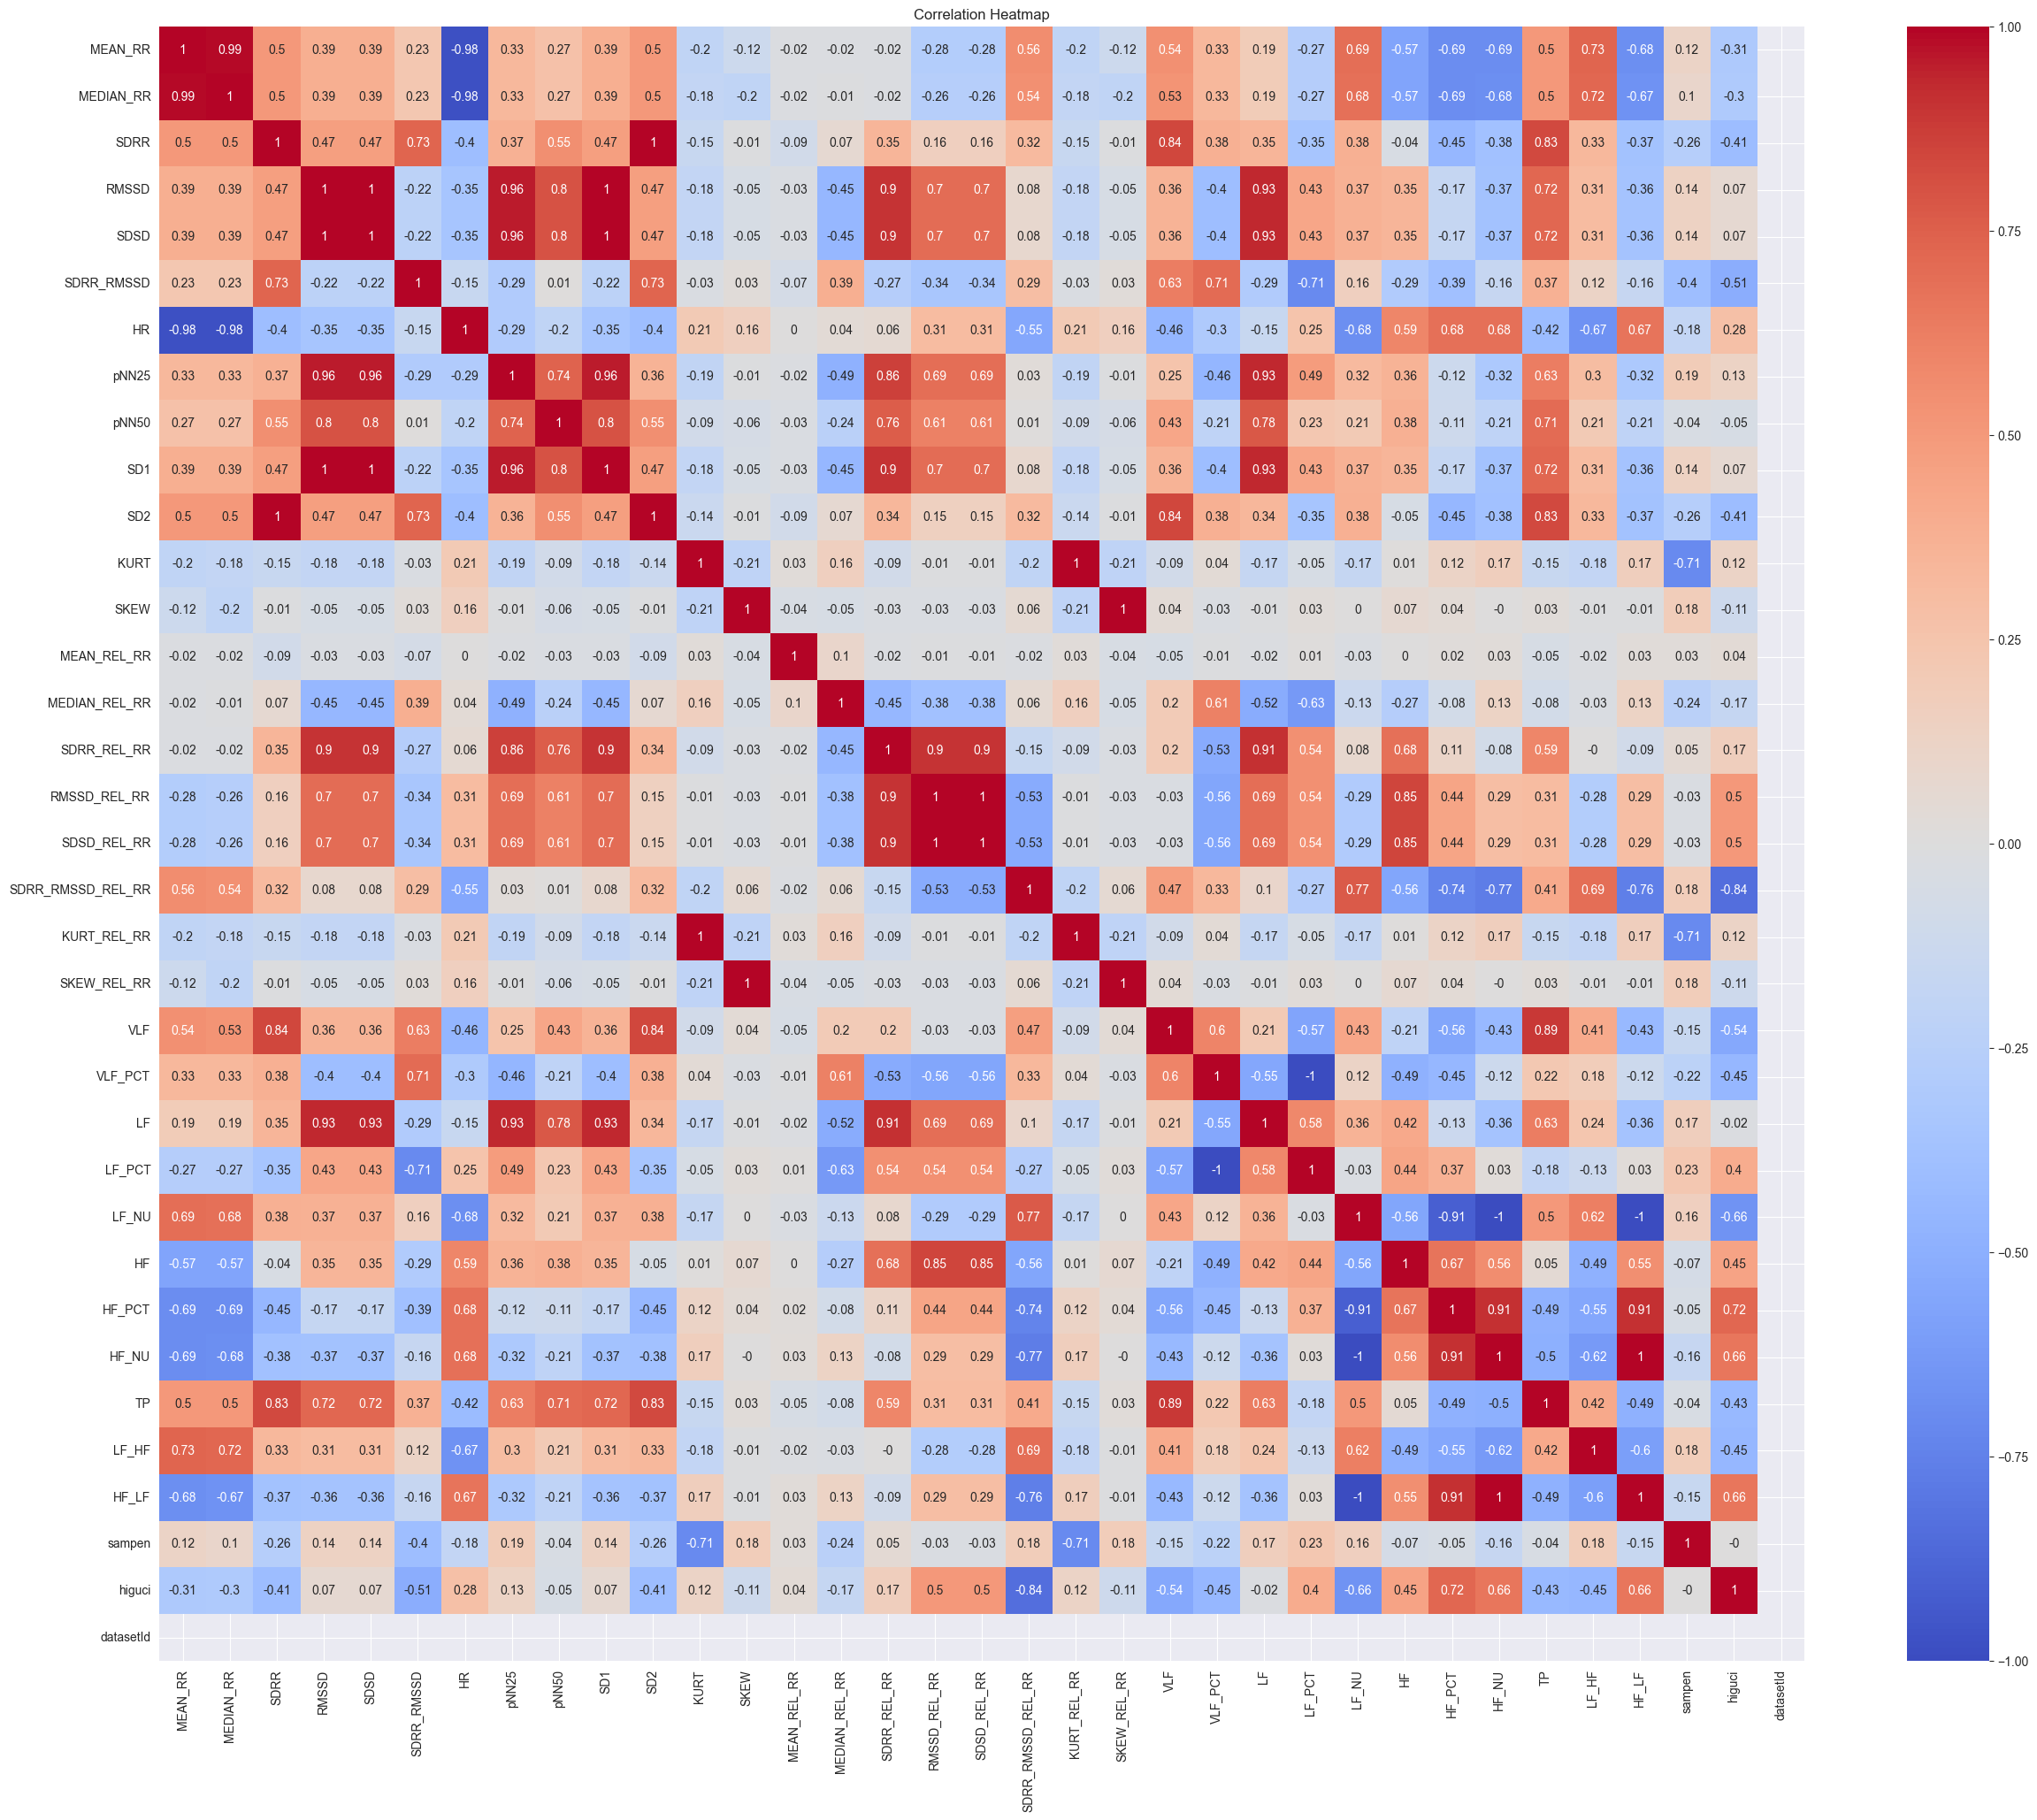

In [65]:
heatmap(cleaned_df)

In [66]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262529 entries, 0 to 369288
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            262529 non-null  float64
 1   MEDIAN_RR          262529 non-null  float64
 2   SDRR               262529 non-null  float64
 3   RMSSD              262529 non-null  float64
 4   SDSD               262529 non-null  float64
 5   SDRR_RMSSD         262529 non-null  float64
 6   HR                 262529 non-null  float64
 7   pNN25              262529 non-null  float64
 8   pNN50              262529 non-null  float64
 9   SD1                262529 non-null  float64
 10  SD2                262529 non-null  float64
 11  KURT               262529 non-null  float64
 12  SKEW               262529 non-null  float64
 13  MEAN_REL_RR        262529 non-null  float64
 14  MEDIAN_REL_RR      262529 non-null  float64
 15  SDRR_REL_RR        262529 non-null  float64
 16  RMSSD_R

In [67]:
cleaned_df.describe()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId
count,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,...,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.0
mean,835.667885,837.801577,80.974137,14.347960,14.347696,5.752837,73.469985,8.955911,0.588988,10.148739,...,96.284190,29.919118,1.507661,3.715810,2549.765312,68.134451,0.039694,2.134098,1.189015,2.0
std,91.954545,93.014938,30.533233,3.999873,3.999852,1.759415,8.174249,8.116847,0.794100,2.829266,...,3.074492,27.592587,1.418724,3.074492,1223.187530,82.869742,0.034551,0.071677,0.057966,0.0
min,562.622537,554.940320,27.233947,5.529742,5.529630,2.660381,55.217892,0.000000,0.000000,3.911344,...,85.139373,1.125854,0.038147,0.224151,377.692795,5.729191,0.002247,1.875733,1.057620,2.0
25%,771.626190,773.441115,60.240740,11.356373,11.356088,4.409377,67.446295,3.000000,0.000000,8.032647,...,94.632478,11.399918,0.406526,1.226358,1613.439211,17.630569,0.012416,2.099025,1.147065,2.0
50%,820.551163,826.958170,74.143012,13.689216,13.689131,5.543480,73.787398,6.400000,0.200000,9.682907,...,97.068745,22.921329,1.074651,2.931255,2396.544464,33.115082,0.030198,2.155677,1.179494,2.0
75%,899.719431,902.370180,95.411926,16.944896,16.944476,6.686320,78.409798,11.933333,0.866667,11.985553,...,98.773642,37.578683,2.080445,5.367522,3313.622182,80.542229,0.056720,2.187043,1.225979,2.0
max,1111.686777,1145.789550,237.830744,26.502718,26.502507,14.774340,107.185211,39.400000,4.600000,18.746357,...,99.775849,129.894994,7.169156,14.860627,7456.421182,445.128249,0.174545,2.234841,1.354918,2.0


In [68]:
def box_plot(df):
    plt.figure(figsize=(30, 24))
    sns.boxplot(data=df, orient='v', palette='Set2')
    plt.title('Boxplot of Numerical Features')
    plt.show()

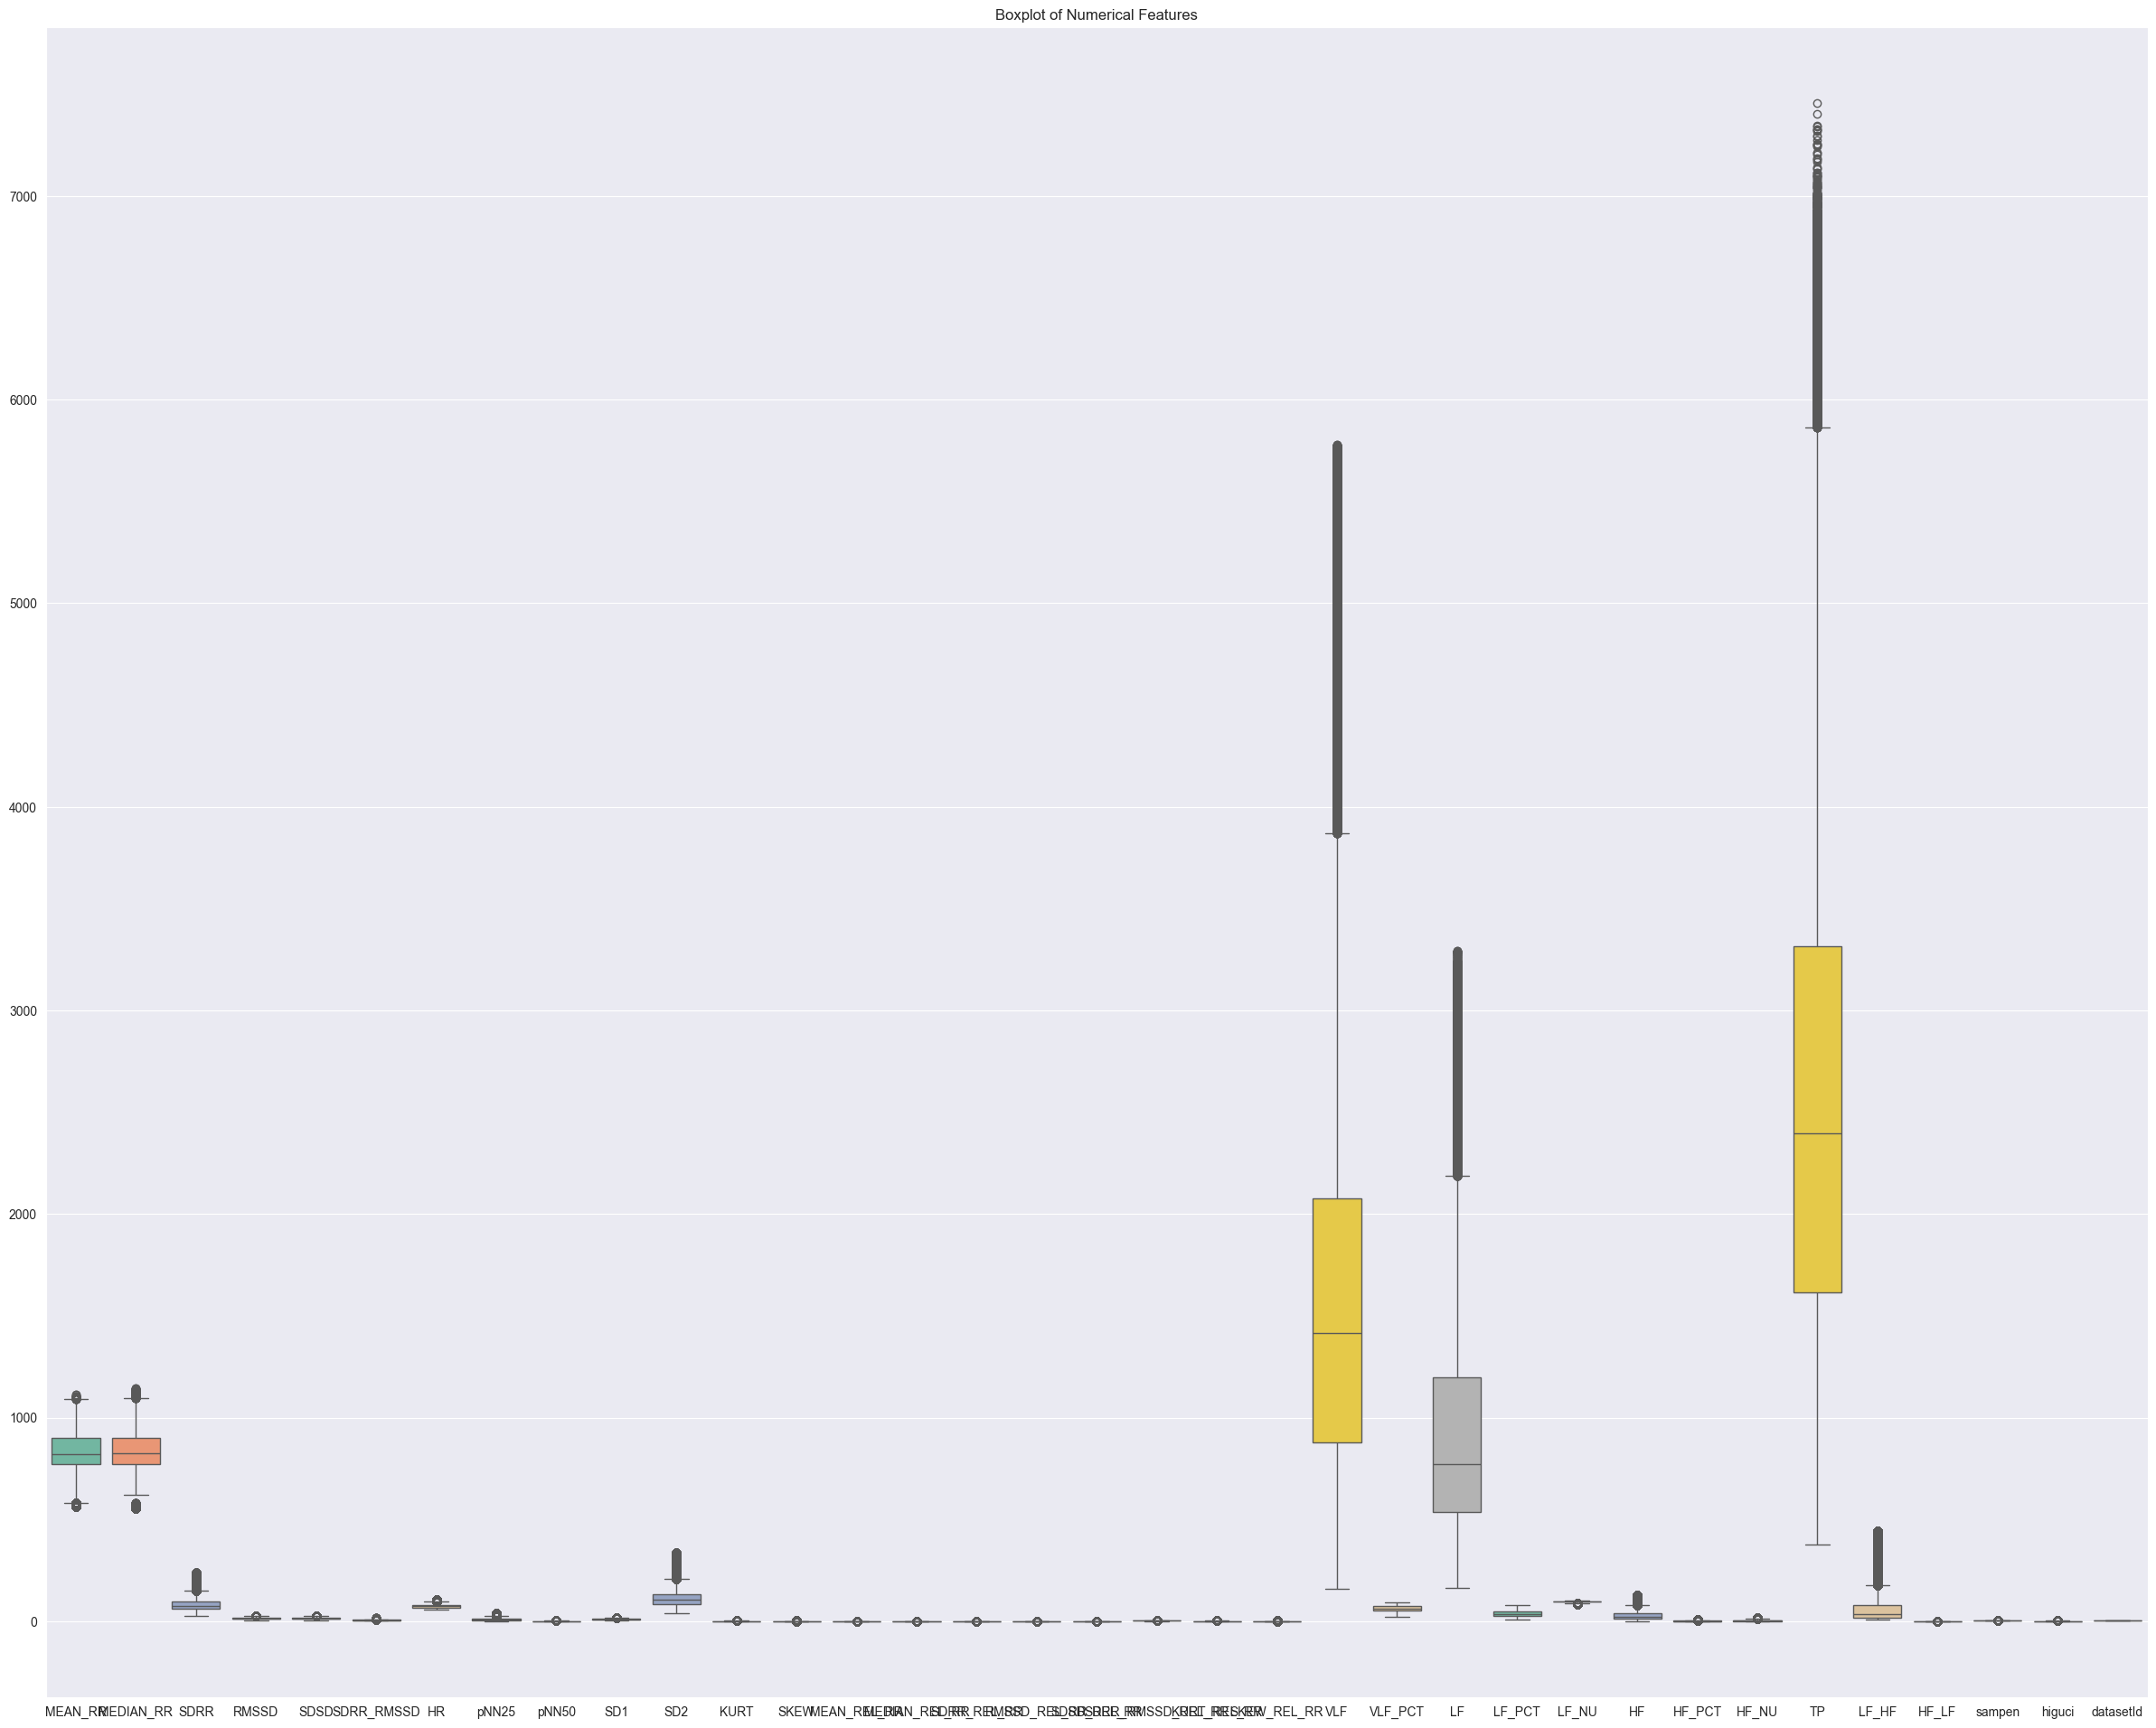

In [69]:
box_plot(cleaned_df)

In [70]:
def train_and_evaluate_models(df):
    X = df.drop(columns=['condition', 'datasetId'])
    y = df['condition']
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42),
        "Naive Bayes": GaussianNB(),
        "Perceptron": Perceptron(max_iter=1000, random_state=42),
    }

    # Dictionary to store model accuracies
    model_accuracies = {}
    best_model = None  # To hold the best model
    best_accuracy = 0  # To hold the best accuracy

    # Loop through the models and train, test, and evaluate them
    for model_name, model in models.items():
        print(f"\nTraining and evaluating {model_name}...")
        
        start_time = time.time()  # Start time
        model.fit(X_train, y_train)
        end_time = time.time()  # End time
        
        # Make predictions on both the training and testing set
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate the metrics for the testing set
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # Store the model if it has the best accuracy so far
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_model = model

        # Print the results
        print(f"\n{model_name} - Testing Metrics:")
        print(f"Accuracy: {test_accuracy:.4f}")

        # Display classification report for a detailed breakdown
        print(f"\n{model_name} - Classification Report on Test Data:\n", classification_report(y_test, y_test_pred, digits=4))

        # Print the time taken for training
        print(f"Time taken to train {model_name}: {end_time - start_time:.4f} seconds")

    return best_model




In [71]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262529 entries, 0 to 369288
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            262529 non-null  float64
 1   MEDIAN_RR          262529 non-null  float64
 2   SDRR               262529 non-null  float64
 3   RMSSD              262529 non-null  float64
 4   SDSD               262529 non-null  float64
 5   SDRR_RMSSD         262529 non-null  float64
 6   HR                 262529 non-null  float64
 7   pNN25              262529 non-null  float64
 8   pNN50              262529 non-null  float64
 9   SD1                262529 non-null  float64
 10  SD2                262529 non-null  float64
 11  KURT               262529 non-null  float64
 12  SKEW               262529 non-null  float64
 13  MEAN_REL_RR        262529 non-null  float64
 14  MEDIAN_REL_RR      262529 non-null  float64
 15  SDRR_REL_RR        262529 non-null  float64
 16  RMSSD_R

In [72]:
best_model_33_features = train_and_evaluate_models(cleaned_df)


Training and evaluating Logistic Regression...

Logistic Regression - Testing Metrics:
Accuracy: 0.6628

Logistic Regression - Classification Report on Test Data:
               precision    recall  f1-score   support

           0     0.6734    0.5905    0.6292     25446
           1     0.6549    0.7307    0.6907     27060

    accuracy                         0.6628     52506
   macro avg     0.6642    0.6606    0.6600     52506
weighted avg     0.6639    0.6628    0.6609     52506

Time taken to train Logistic Regression: 20.6780 seconds

Training and evaluating Decision Tree...

Decision Tree - Testing Metrics:
Accuracy: 0.8656

Decision Tree - Classification Report on Test Data:
               precision    recall  f1-score   support

           0     0.8595    0.8639    0.8617     25446
           1     0.8714    0.8672    0.8693     27060

    accuracy                         0.8656     52506
   macro avg     0.8654    0.8655    0.8655     52506
weighted avg     0.8656    0.865

In [73]:
with open('RF_model_33_features.pkl', 'wb') as file:
    pickle.dump(best_model_33_features, file)
    
print("Model saved to 'RF_model_33_features.pkl'")

Model saved to 'RF_model_33_features.pkl'


In [74]:
# Import necessary libraries
import scipy.stats as stats

# Drop irrelevant columns and calculate degree of freedom
ndf = cleaned_df.drop(columns=['condition', 'datasetId'])
n = ndf.shape[0]
degree_of_freedom = n + n - 2

# Calculate the critical t-value for a two-tailed test at 0.05 significance level
t_critical = stats.t.ppf(1 - 0.05 / 2, degree_of_freedom)
print(f"Critical t-value: {t_critical}")

# Calculate the correlation matrix
correlation_matrix = ndf.corr()

# Set threshold for strong correlation
threshold = 0.75

# Find all feature pairs with absolute correlation above the threshold
feature_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Print feature pairs with high correlation
print("Feature pairs with high correlation:")
for pair in feature_pairs:
    print(pair)

# Perform t-tests for each feature pair and compare with t_critical
results = {}
for feature1, feature2 in feature_pairs:
    # Perform t-test for the two features
    t_stat, p_value = stats.ttest_ind(ndf[feature1], ndf[feature2])
    results[(feature1, feature2)] = {'t-statistic': t_stat, 'p-value': p_value}

    # Check if the absolute t-statistic is less than the critical value
    if abs(t_stat) < t_critical:
        print(f"The features '{feature1}' and '{feature2}' should be merged (t-statistic = {t_stat}, p-value = {p_value})")
    else:
        print(f"The features '{feature1}' and '{feature2}' are significantly different (t-statistic = {t_stat}, p-value = {p_value})")

Critical t-value: 1.9599685026802254
Feature pairs with high correlation:
('MEAN_RR', 'MEDIAN_RR')
('MEAN_RR', 'HR')
('MEDIAN_RR', 'HR')
('SDRR', 'SD2')
('SDRR', 'VLF')
('SDRR', 'TP')
('RMSSD', 'SDSD')
('RMSSD', 'pNN25')
('RMSSD', 'pNN50')
('RMSSD', 'SD1')
('RMSSD', 'SDRR_REL_RR')
('RMSSD', 'LF')
('SDSD', 'pNN25')
('SDSD', 'pNN50')
('SDSD', 'SD1')
('SDSD', 'SDRR_REL_RR')
('SDSD', 'LF')
('pNN25', 'SD1')
('pNN25', 'SDRR_REL_RR')
('pNN25', 'LF')
('pNN50', 'SD1')
('pNN50', 'SDRR_REL_RR')
('pNN50', 'LF')
('SD1', 'SDRR_REL_RR')
('SD1', 'LF')
('SD2', 'VLF')
('SD2', 'TP')
('KURT', 'KURT_REL_RR')
('SKEW', 'SKEW_REL_RR')
('SDRR_REL_RR', 'RMSSD_REL_RR')
('SDRR_REL_RR', 'SDSD_REL_RR')
('SDRR_REL_RR', 'LF')
('RMSSD_REL_RR', 'SDSD_REL_RR')
('RMSSD_REL_RR', 'HF')
('SDSD_REL_RR', 'HF')
('SDRR_RMSSD_REL_RR', 'LF_NU')
('SDRR_RMSSD_REL_RR', 'HF_NU')
('SDRR_RMSSD_REL_RR', 'HF_LF')
('SDRR_RMSSD_REL_RR', 'higuci')
('VLF', 'TP')
('VLF_PCT', 'LF_PCT')
('LF_NU', 'HF_PCT')
('LF_NU', 'HF_NU')
('LF_NU', 'HF_LF')


In [75]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming `cleaned_df` is your DataFrame with all the features

# 1. Merge Practically Identical Features
# These features are identical or nearly identical, so we can merge them by taking the average or just dropping one.
cleaned_df['RMSSD_SDSD'] = (cleaned_df['RMSSD'] + cleaned_df['SDSD']) / 2
cleaned_df.drop(columns=['RMSSD', 'SDSD'], inplace=True)

cleaned_df['KURT_MERGED'] = (cleaned_df['KURT'] + cleaned_df['KURT_REL_RR']) / 2
cleaned_df.drop(columns=['KURT', 'KURT_REL_RR'], inplace=True)

cleaned_df['SKEW_MERGED'] = (cleaned_df['SKEW'] + cleaned_df['SKEW_REL_RR']) / 2
cleaned_df.drop(columns=['SKEW', 'SKEW_REL_RR'], inplace=True)

cleaned_df['RMSSD_SDSD_REL_RR'] = (cleaned_df['RMSSD_REL_RR'] + cleaned_df['SDSD_REL_RR']) / 2
cleaned_df.drop(columns=['RMSSD_REL_RR', 'SDSD_REL_RR'], inplace=True)

# 2. Dimensionality Reduction using PCA for correlated but significantly different features
# Let's assume you identified the following features as highly correlated but distinct:
correlated_features = ['MEAN_RR', 'MEDIAN_RR', 'HR', 'SDRR', 'SD2', 'VLF', 'TP', 'LF_NU', 'HF_PCT', 'HF_NU', 'HF_LF']

# Standardize the data for PCA
scaler = StandardScaler()
cleaned_df_scaled = scaler.fit_transform(cleaned_df[correlated_features])

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Keep 95% of variance
pca_result = pca.fit_transform(cleaned_df_scaled)

# Create new PCA component columns in the DataFrame
for i in range(pca_result.shape[1]):
    cleaned_df[f'PCA_Component_{i+1}'] = pca_result[:, i]

# Drop the original correlated features after PCA
cleaned_df.drop(columns=correlated_features, inplace=True)

# Now cleaned_df will contain the merged features and the PCA components.


In [76]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262529 entries, 0 to 369288
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SDRR_RMSSD         262529 non-null  float64
 1   pNN25              262529 non-null  float64
 2   pNN50              262529 non-null  float64
 3   SD1                262529 non-null  float64
 4   MEAN_REL_RR        262529 non-null  float64
 5   MEDIAN_REL_RR      262529 non-null  float64
 6   SDRR_REL_RR        262529 non-null  float64
 7   SDRR_RMSSD_REL_RR  262529 non-null  float64
 8   VLF_PCT            262529 non-null  float64
 9   LF                 262529 non-null  float64
 10  LF_PCT             262529 non-null  float64
 11  HF                 262529 non-null  float64
 12  LF_HF              262529 non-null  float64
 13  sampen             262529 non-null  float64
 14  higuci             262529 non-null  float64
 15  datasetId          262529 non-null  int64  
 16  conditi

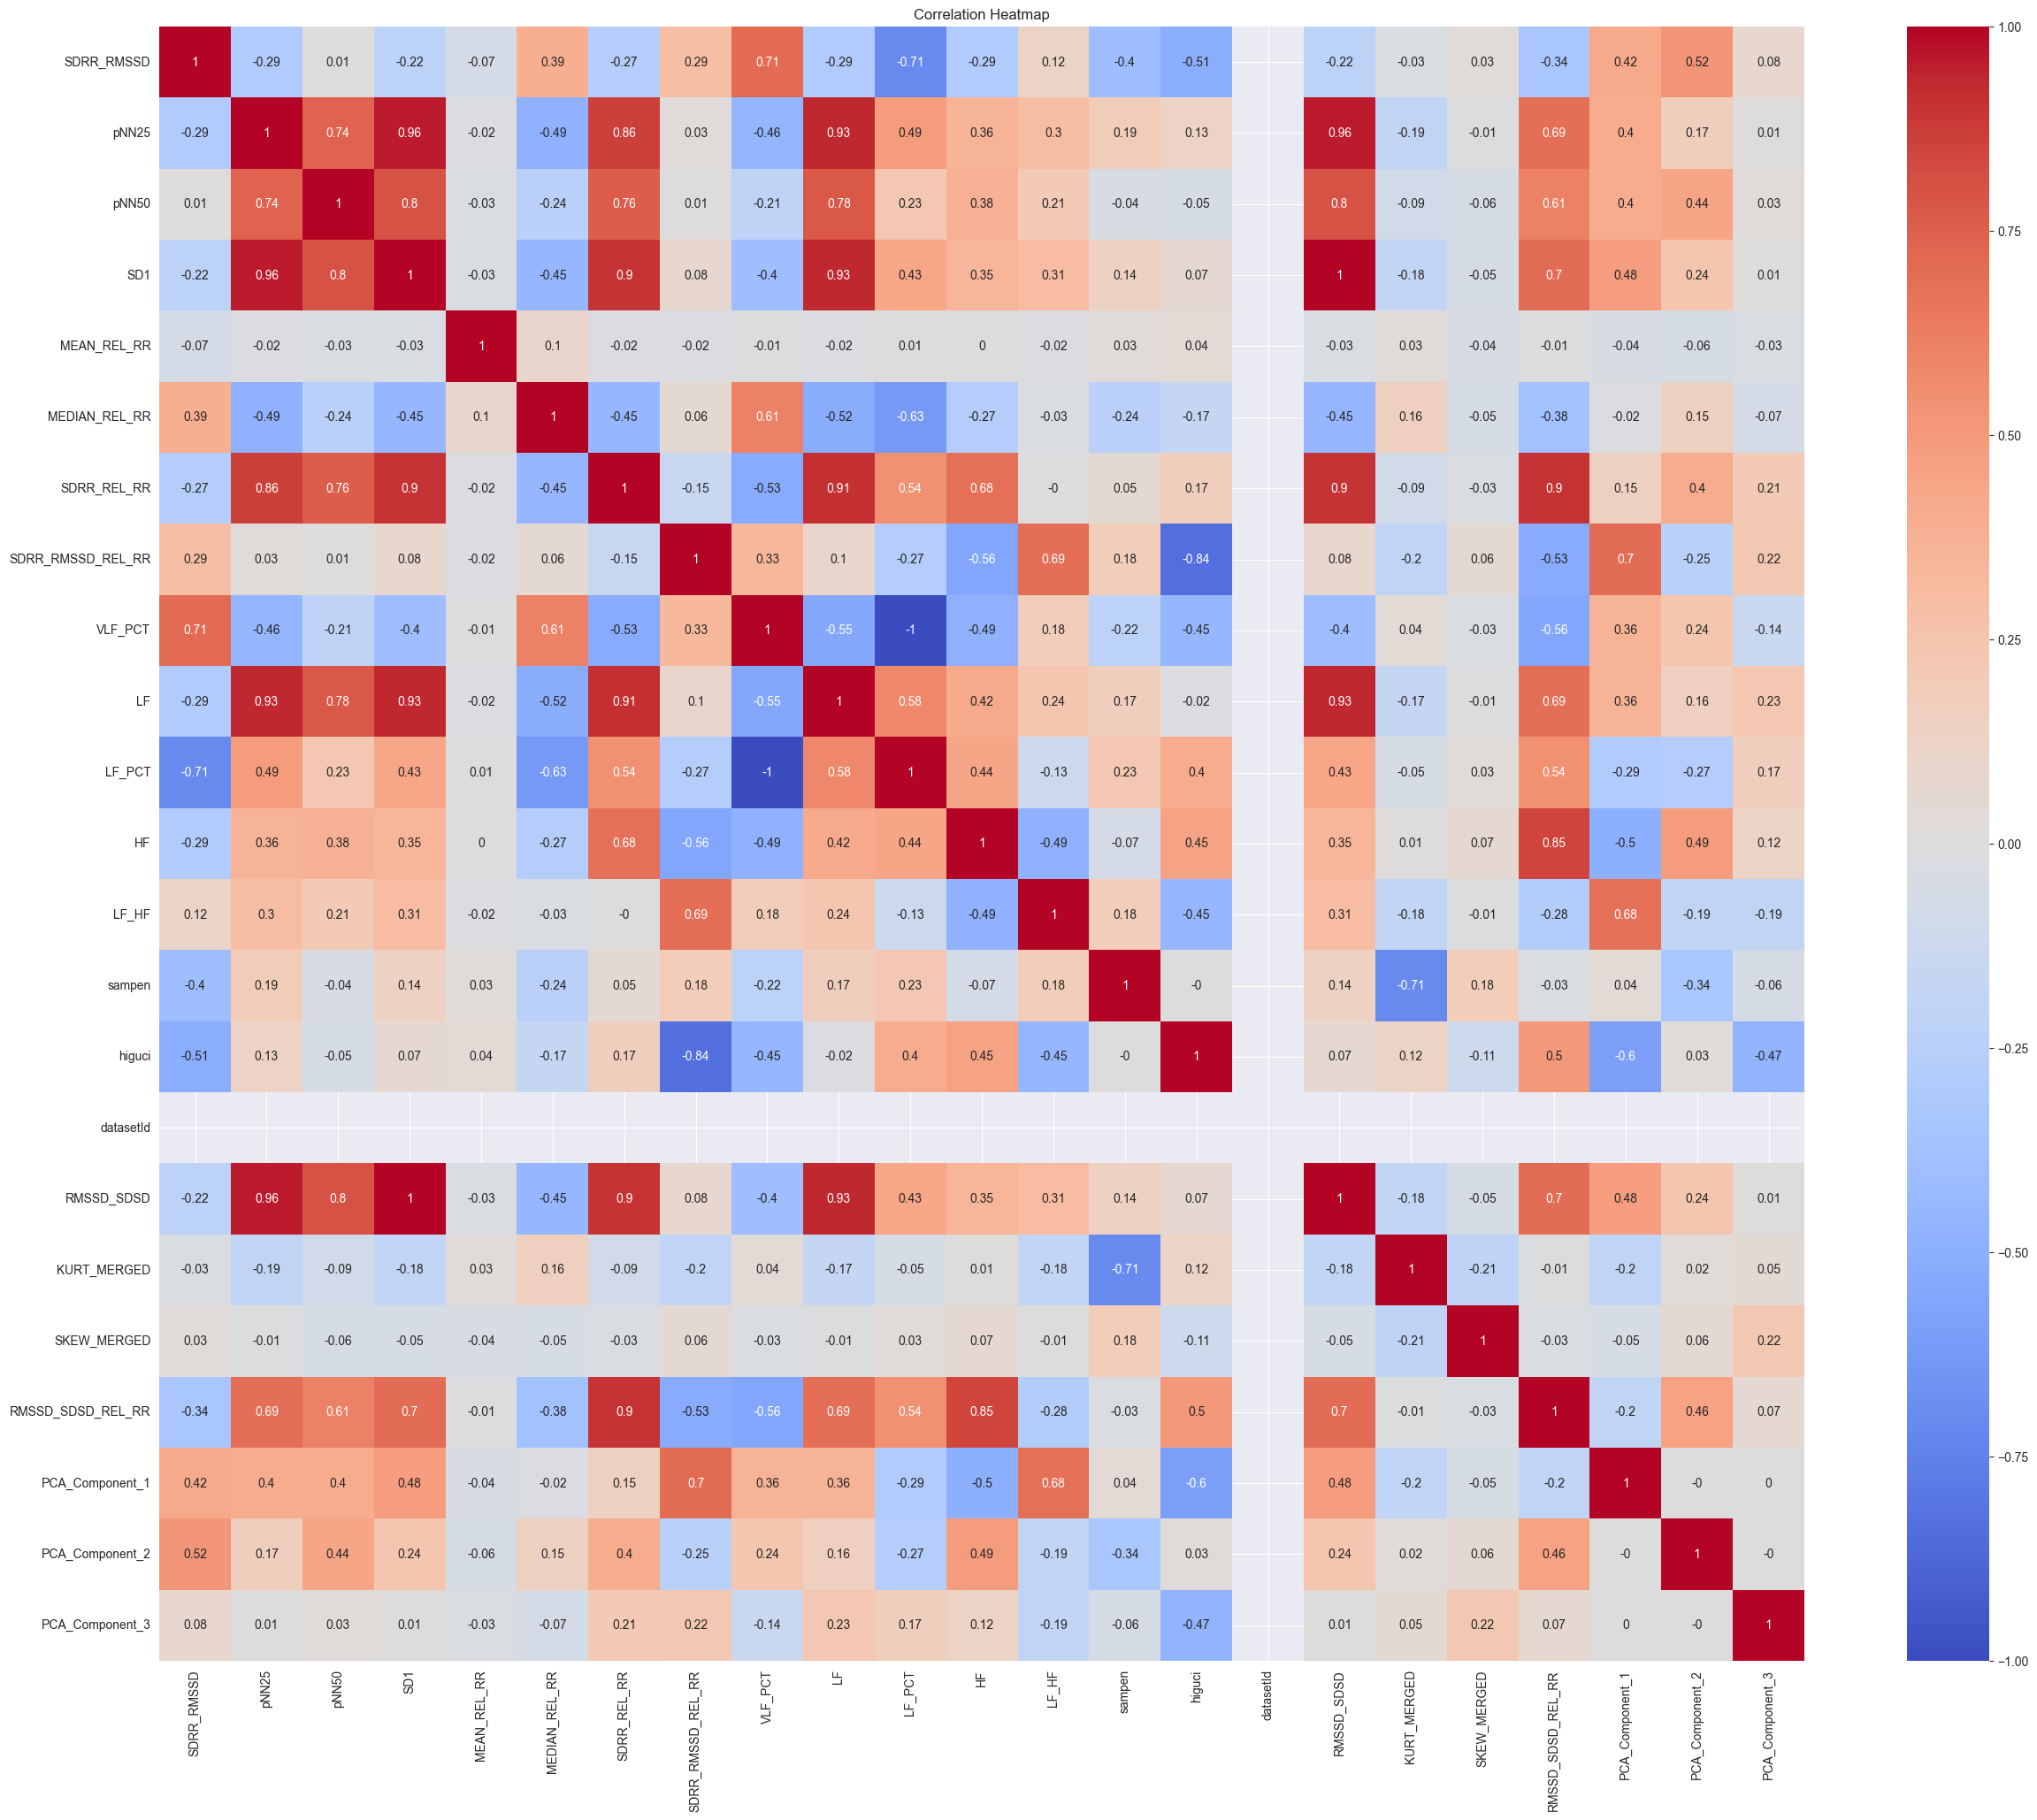

In [77]:
heatmap(cleaned_df)

In [78]:
best_model_22_features = train_and_evaluate_models(cleaned_df)


Training and evaluating Logistic Regression...

Logistic Regression - Testing Metrics:
Accuracy: 0.6508

Logistic Regression - Classification Report on Test Data:
               precision    recall  f1-score   support

           0     0.6579    0.5823    0.6178     25446
           1     0.6455    0.7153    0.6786     27060

    accuracy                         0.6508     52506
   macro avg     0.6517    0.6488    0.6482     52506
weighted avg     0.6515    0.6508    0.6491     52506

Time taken to train Logistic Regression: 8.4000 seconds

Training and evaluating Decision Tree...

Decision Tree - Testing Metrics:
Accuracy: 0.8650

Decision Tree - Classification Report on Test Data:
               precision    recall  f1-score   support

           0     0.8591    0.8630    0.8610     25446
           1     0.8706    0.8669    0.8687     27060

    accuracy                         0.8650     52506
   macro avg     0.8649    0.8649    0.8649     52506
weighted avg     0.8650    0.8650

In [79]:
with open('RF_model_22_features.pkl', 'wb') as file:
    pickle.dump(best_model_22_features, file)
    
print("Model saved to 'RF_model_22_features.pkl'")

Model saved to 'RF_model_22_features.pkl'


In [80]:
def most_important_feature_RF(df):
    # Separate features (X) and target (y)
    X = df.drop(columns=['condition', 'datasetId'])
    y = df['condition']

    # Encode the target labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # Train a Random Forest model
    rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
    rf_model.fit(X_train, y_train)

    # Calculate feature importances
    feature_importances = rf_model.feature_importances_

    # Create a DataFrame to map feature names to their importance
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    # Display the most important feature
    most_important_feature = feature_importance_df.iloc[0]['Feature']

    print("Most important feature:", most_important_feature)
    print(feature_importance_df)

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in Random Forest')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
    plt.show()

    return rf_model, feature_importance_df

# Example usage (assuming df is your DataFrame)
# rf_model, feature_importance_df = train_and_evaluate_models(df)


Most important feature: PCA_Component_1
              Feature  Importance
19    PCA_Component_1    0.071896
14             higuci    0.060041
17        SKEW_MERGED    0.055307
7   SDRR_RMSSD_REL_RR    0.054118
3                 SD1    0.052204
21    PCA_Component_3    0.052039
11                 HF    0.051633
15         RMSSD_SDSD    0.050907
0          SDRR_RMSSD    0.048713
18  RMSSD_SDSD_REL_RR    0.048597
5       MEDIAN_REL_RR    0.046268
6         SDRR_REL_RR    0.044507
1               pNN25    0.043821
9                  LF    0.043454
12              LF_HF    0.041896
20    PCA_Component_2    0.041744
8             VLF_PCT    0.041046
16        KURT_MERGED    0.040893
10             LF_PCT    0.037240
13             sampen    0.034760
2               pNN50    0.024205
4         MEAN_REL_RR    0.014712


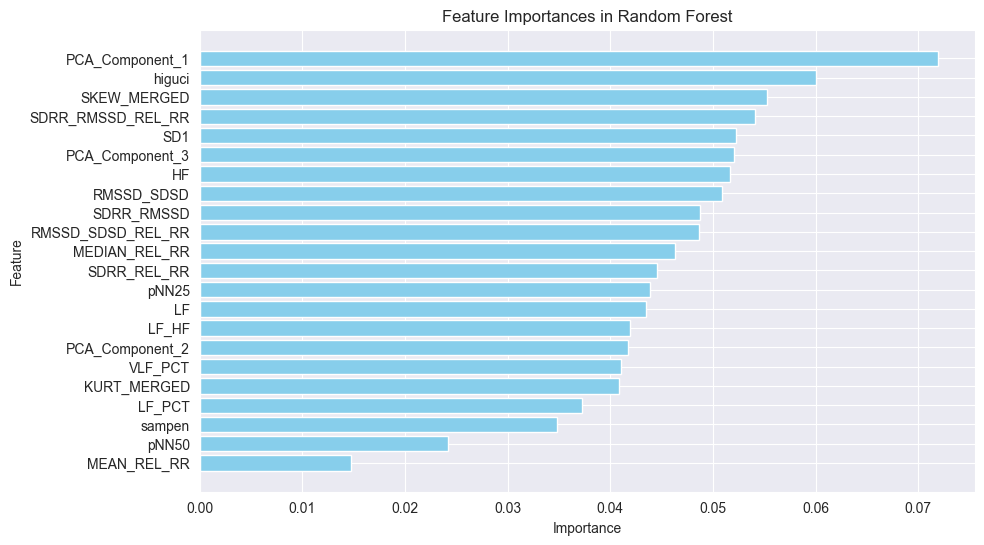

In [81]:
rf_model, feature_importance_df_rf = most_important_feature_RF(cleaned_df)

In [82]:
feature_importance_df_rf

,Feature,Importance
19,PCA_Component_1,0.071896
14,higuci,0.060041
17,SKEW_MERGED,0.055307
7,SDRR_RMSSD_REL_RR,0.054118
3,SD1,0.052204
21,PCA_Component_3,0.052039
11,HF,0.051633
15,RMSSD_SDSD,0.050907
0,SDRR_RMSSD,0.048713
18,RMSSD_SDSD_REL_RR,0.048597


In [ ]:
top_20_features = feature_importance_df_rf.sort_values(by='Importance', ascending=False)[:20]

In [98]:
def train_and_evaluate(df, feature_importance_df_rf, top_n_features):
    
    X = df.drop(columns=['condition'])
    y = df['condition']
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)  # Convert to DataFrame
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    
    results = {}
    
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42),
        "Naive Bayes": GaussianNB(),
        "Perceptron": Perceptron(max_iter=1000, random_state=42),
    }
    
    # Extract top N features by importance
    top_features = feature_importance_df_rf.sort_values(by='Importance', ascending=False).iloc[:top_n_features]['Feature']
    print(top_features)
    X_top = X_scaled[top_features]  # Select columns based on top feature names
    
    # Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_top, y_encoded, test_size=0.2, random_state=42)
    
    best_model = None
    best_accuracy = 0
    
    for model_name, model in models.items():
        print(f"Training model '{model_name}'...")
        
        start_time = time.time()
        # Train the model
        model.fit(X_train, y_train)
        end_time = time.time()
        
        # Predict
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        # Calculate metrics
        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        precision = precision_score(y_test, y_pred_test, average='weighted')
        recall = recall_score(y_test, y_pred_test, average='weighted')
        f1 = f1_score(y_test, y_pred_test, average='weighted')
        training_time = end_time - start_time
        
        # Store results
        results[model_name] = {
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'training_time': training_time
        }
        
        # Track best model
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_model = model
    
    return results, best_model

In [99]:
for top_n in [20, 15, 10, 7, 5]:
    print(f"\nEvaluating models with top {top_n} features")
    results, best_model = train_and_evaluate(cleaned_df, feature_importance_df_rf, top_n)
    print("Results:", results)
    print(f"Best model for top {top_n} features: {best_model}")
    name = f"{top_n}_{best_model}.pkl"
    with open(name, 'wb') as file:
        pickle.dump(best_model, file)
    print(f"Model saved to {name}")


Evaluating models with top 20 features
19      PCA_Component_1
14               higuci
17          SKEW_MERGED
7     SDRR_RMSSD_REL_RR
3                   SD1
21      PCA_Component_3
11                   HF
15           RMSSD_SDSD
0            SDRR_RMSSD
18    RMSSD_SDSD_REL_RR
5         MEDIAN_REL_RR
6           SDRR_REL_RR
1                 pNN25
9                    LF
12                LF_HF
20      PCA_Component_2
8               VLF_PCT
16          KURT_MERGED
10               LF_PCT
13               sampen
Name: Feature, dtype: object
Training model 'Logistic Regression'...
Training model 'Decision Tree'...
Training model 'Random Forest'...
Training model 'Naive Bayes'...
Training model 'Perceptron'...
Results: {'Logistic Regression': {'train_accuracy': 0.6477623879289411, 'test_accuracy': 0.6489924960956843, 'precision': 0.6497004299948305, 'recall': 0.6489924960956843, 'f1_score': 0.6472379707393715, 'training_time': 9.44328784942627}, 'Decision Tree': {'train_accuracy': 1.0,

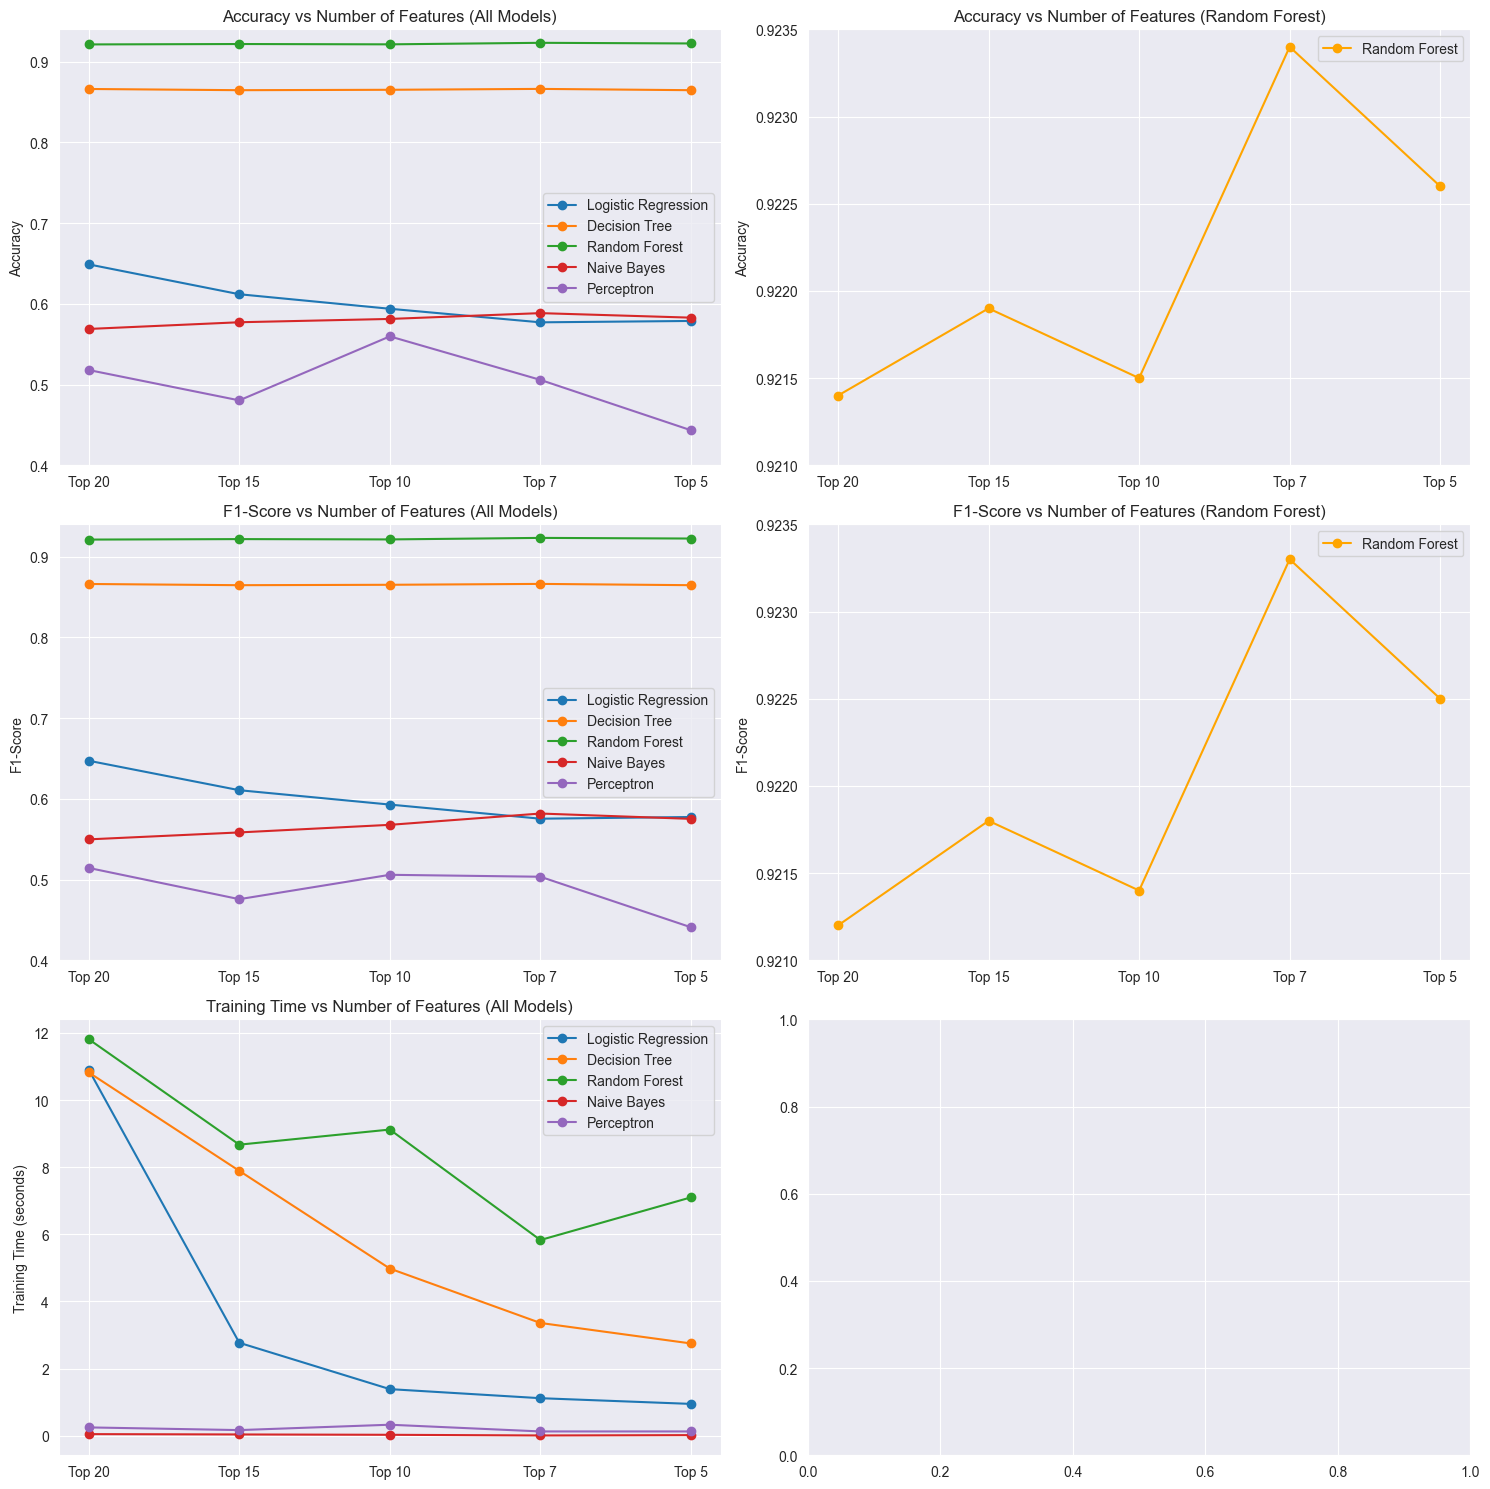

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# Data
features = ['Top 20', 'Top 15', 'Top 10', 'Top 7', 'Top 5']

# Accuracy values
accuracy_values = {
    'Logistic Regression': [0.6489, 0.6119, 0.5939, 0.5771, 0.5788],
    'Decision Tree': [0.8662, 0.8647, 0.8652, 0.8663, 0.8647],
    'Random Forest': [0.9214, 0.9219, 0.9215, 0.9234, 0.9226],
    'Naive Bayes': [0.5689, 0.5772, 0.5813, 0.5885, 0.5829],
    'Perceptron': [0.5180, 0.4804, 0.5597, 0.5058, 0.4434]
}

# F1-score values
f1_values = {
    'Logistic Regression': [0.6472, 0.6107, 0.5929, 0.5754, 0.5775],
    'Decision Tree': [0.8662, 0.8647, 0.8652, 0.8663, 0.8647],
    'Random Forest': [0.9212, 0.9218, 0.9214, 0.9233, 0.9225],
    'Naive Bayes': [0.5498, 0.5584, 0.5678, 0.5818, 0.5752],
    'Perceptron': [0.5144, 0.4757, 0.5059, 0.5035, 0.4409]
}

# Training time values (in seconds)
time_values = {
    'Logistic Regression': [10.90, 2.77, 1.39, 1.12, 0.95],
    'Decision Tree': [10.82, 7.89, 4.98, 3.36, 2.75],
    'Random Forest': [11.81, 8.67, 9.12, 5.83, 7.10],
    'Naive Bayes': [0.05, 0.04, 0.03, 0.01, 0.02],
    'Perceptron': [0.25, 0.17, 0.33, 0.13, 0.13]
}

# Create subplots for accuracy, f1-score, and time
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # 2 columns, the second for RF zoomed-in plots

# Accuracy plot (All models)
for model, accuracies in accuracy_values.items():
    axs[0, 0].plot(features, accuracies, marker='o', label=model)
axs[0, 0].set_title('Accuracy vs Number of Features (All Models)')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_ylim([0.40, 0.94])  # Global ylim for other models
axs[0, 0].legend()

# Zoomed-in Accuracy plot for Random Forest
axs[0, 1].plot(features, accuracy_values['Random Forest'], marker='o', label='Random Forest', color='orange')
axs[0, 1].set_title('Accuracy vs Number of Features (Random Forest)')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].set_ylim([0.921, 0.9235])  # Narrow ylim for RF
axs[0, 1].legend()

# F1-score plot (All models)
for model, f1_scores in f1_values.items():
    axs[1, 0].plot(features, f1_scores, marker='o', label=model)
axs[1, 0].set_title('F1-Score vs Number of Features (All Models)')
axs[1, 0].set_ylabel('F1-Score')
axs[1, 0].set_ylim([0.40, 0.94])  # Global ylim for other models
axs[1, 0].legend()

# Zoomed-in F1-score plot for Random Forest
axs[1, 1].plot(features, f1_values['Random Forest'], marker='o', label='Random Forest', color='orange')
axs[1, 1].set_title('F1-Score vs Number of Features (Random Forest)')
axs[1, 1].set_ylabel('F1-Score')
axs[1, 1].set_ylim([0.921, 0.9235])  # Narrow ylim for RF
axs[1, 1].legend()

# Training time plot (All models)
for model, times in time_values.items():
    axs[2, 0].plot(features, times, marker='o', label=model)
axs[2, 0].set_title('Training Time vs Number of Features (All Models)')
axs[2, 0].set_ylabel('Training Time (seconds)')
axs[2, 0].legend()

# No separate plot for training time, as RF time variations are more visible.

# Display the plots
plt.tight_layout()
plt.show()